상관벡터 shape: (25, 153)
     거주인구_교통사고 발생건수  거주인구_기타_부상자수  거주인구_기타_사망자수  거주인구_길가장자리구역통행중_부상자수  \
강남구           -0.38         -0.29          0.09                  0.04   
강동구            0.02          0.25          0.03                  0.03   
강북구            0.71         -0.30         -0.11                  0.49   
강서구            0.06         -0.57         -0.58                  0.33   
관악구            0.85         -0.03          0.09                  0.79   

     거주인구_길가장자리구역통행중_사망자수  거주인구_보도통행중_부상자수  거주인구_보도통행중_사망자수  거주인구_차도 통행중_부상자수  \
강남구                  0.02             0.17             0.17              0.42   
강동구                 -0.13            -0.04            -0.04              0.05   
강북구                 -0.11             0.58            -0.04             -0.12   
강서구                 -0.54             0.29            -0.29              0.57   
관악구                 -0.47             0.68             0.06              0.43   

     거주인구_차도 통행중_사망자수  거주인구_횡단중_부상자수  ...  뺑소니_부상자수_

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

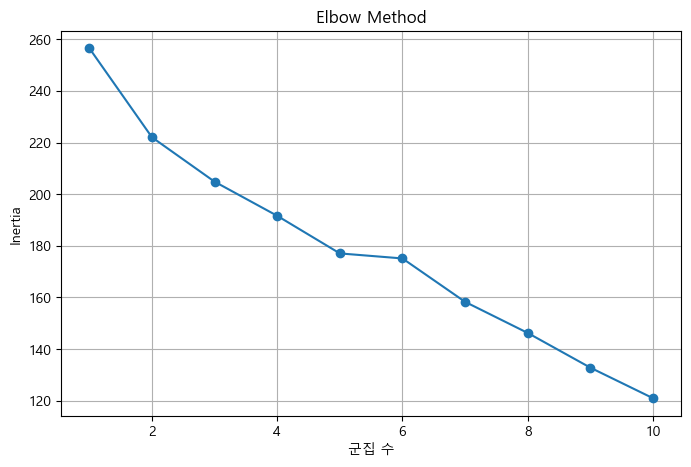

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


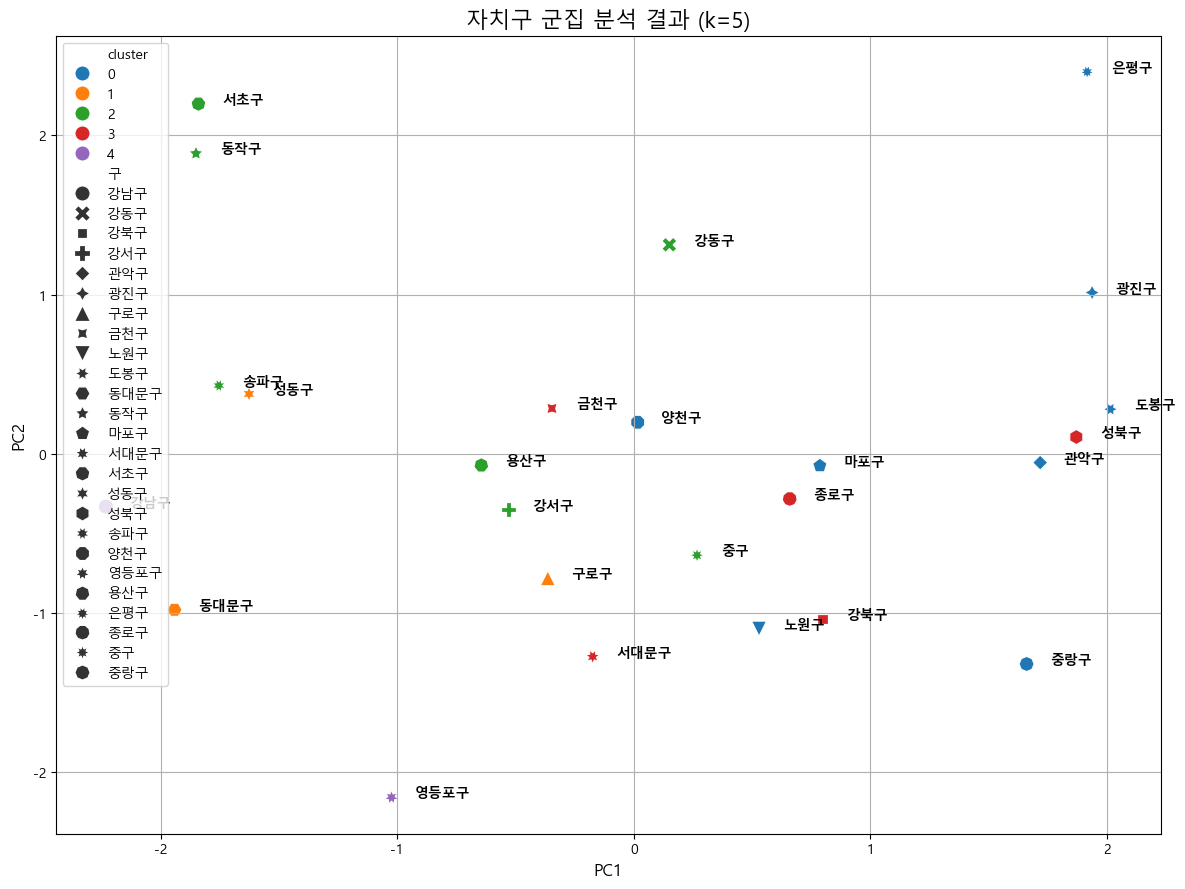

PC1에서 가장 크게 기여한 상관쌍:

교통사고 발생건수_뺑소니_부상자수          0.235059
교통사고 발생건수_뺑소니_발생건수          0.227222
교통사고 발생건수_보도통행중_부상자수        0.195050
보도통행중_부상자수_뺑소니_발생건수         0.194409
보도통행중_부상자수_뺑소니_부상자수         0.188623
교통사고 발생건수_차도 통행중_부상자수       0.184362
길가장자리구역통행중_부상자수_뺑소니_부상자수    0.182890
길가장자리구역통행중_부상자수_뺑소니_발생건수    0.178474
거주인구_교통사고 발생건수              0.173454
거주인구_보도통행중_부상자수             0.156223
뺑소니_부상자수_자전거_발생건수           0.152049
보도통행중_부상자수_횡단중_부상자수         0.149284
뺑소니_부상자수_자전거_부상자수           0.143239
교통사고 발생건수_횡단중_사망자수          0.139634
차도 통행중_부상자수_자전거_발생건수        0.135888
dtype: float64

-----------------------------

PC2에서 가장 크게 기여한 상관쌍:

교통사고 발생건수_자전거_부상자수          0.209506
교통사고 발생건수_자전거_발생건수          0.202107
보도통행중_부상자수_자전거_부상자수         0.180828
보도통행중_부상자수_자전거_발생건수         0.176429
횡단중_부상자수_자전거_부상자수           0.174163
횡단중_부상자수_자전거_발생건수           0.168569
거주인구_뺑소니_발생건수               0.156942
뺑소니_부상자수_자전거_부상자수           0.149880
거주인구_뺑소니_부상자수               0.146919
거주인구_자전거_부상자수        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import font_manager, rc
import platform

# 시스템별 한글 폰트 설정
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
file_path = 'data/regression_data/regression_final.csv'
df = pd.read_csv(file_path, encoding='utf-8-sig')

# 분석 대상 컬럼 정의
target_columns = [col for col in df.columns if col not in ['자치구', '연도']]

# 자치구별 상관행렬 계산 및 벡터화
correlation_dict = {}
for region in df['자치구'].dropna().unique():
    df_region = df[df['자치구'] == region]
    corr_matrix = df_region[target_columns].corr(method='pearson').round(2)
    correlation_dict[region] = corr_matrix

gu_vectors = {}
for gu, corr_df in correlation_dict.items():
    cols = corr_df.columns
    pair_names = [f'{cols[i]}_{cols[j]}' for i, j in zip(*np.triu_indices(len(cols), k=1))]
    flat_values = corr_df.values[np.triu_indices_from(corr_df, k=1)]
    gu_vectors[gu] = pd.Series(flat_values, index=pair_names)

df_vectors = pd.DataFrame(gu_vectors).T
print("상관벡터 shape:", df_vectors.shape)
print(df_vectors.head())

inertias = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_vectors)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('군집 수')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# PCA 수행
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_vectors)
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['구'] = df_vectors.index

# KMeans 클러스터링 (k=5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_vectors)

# 시각화
plt.figure(figsize=(12, 9))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', style='구', palette='tab10', s=120)
for i in range(len(df_pca)):
    plt.text(df_pca['PC1'][i] + 0.1, df_pca['PC2'][i], df_pca['구'][i], fontsize=10, fontweight='bold')
plt.title(f'자치구 군집 분석 결과 (k={k})', fontsize=16)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# 주성분 기여도 분석
correlation_features = df_vectors.columns
pc1_weights = pd.Series(pca.components_[0], index=correlation_features)
pc2_weights = pd.Series(pca.components_[1], index=correlation_features)

top_pc1 = pc1_weights.abs().sort_values(ascending=False).head(15)
top_pc2 = pc2_weights.abs().sort_values(ascending=False).head(15)

print("PC1에서 가장 크게 기여한 상관쌍:\n")
print(top_pc1)

print("\n-----------------------------\n")

print("PC2에서 가장 크게 기여한 상관쌍:\n")
print(top_pc2)

In [2]:
# 자치구별 클러스터 정리
cluster_result = df_pca[['구', 'cluster']].rename(columns={'구': '자치구'})
cluster_result = cluster_result.sort_values(by='cluster').reset_index(drop=True)

# 결과 출력
print("자치구별 클러스터 결과:")
print(cluster_result)


자치구별 클러스터 결과:
     자치구  cluster
0    마포구        0
1    은평구        0
2    양천구        0
3    도봉구        0
4    노원구        0
5    중랑구        0
6    광진구        0
7    관악구        0
8    구로구        1
9   동대문구        1
10   성동구        1
11   동작구        2
12    중구        2
13   서초구        2
14   송파구        2
15   용산구        2
16   강동구        2
17   강서구        2
18  서대문구        3
19   금천구        3
20   성북구        3
21   강북구        3
22   종로구        3
23  영등포구        4
24   강남구        4
